## Iterate and Evaluate Your Classifier


It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

* Do any of your classifiers seem to overfit?
* Which seem to perform the best? Why?
* What features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

Five versions of my classifier: 
1. Bernoulli NB straight up
2. Bernoulli NB 70-30 split
3. Bernoulli NB cross-validation 3-folds
4. Bernoulli NB cross-validation 10-folds
5. KNN Cross-validation with 3 folds
6. KNN Cross-validation with 10-folds

## 1. Bernoulli strait-up (no test set)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [2]:
classifiers_compare = pd.DataFrame()
#classifiers_compare.columns = [["Name", "Accuracy"]]

In [3]:
# Grab and process the raw data.
data_path = ("/Users/jacquelynzuker/Desktop/sentiment labelled sentences/amazon_cells_labelled.txt"
            )
amazon_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw.columns = ['message', 'satisfaction']

In [4]:
keywords = ['must have', 'excellent', 'awesome', 'recommend', 'good', 
            'great', 'happy', 'love', 'satisfied', 'best', 'works', 
            'liked', 'easy', 'quick', 'incredible', 'perfectly',
           'right', 'cool', 'joy', 'easier', 'fast', 'nice', 'family',
           'incredible', 'sweetest', 'poor', 'broke', 'doesn\'t work', 
            'not work', 'died', 'don\'t buy', 'problem', 'useless', 
            'awful', 'failed', 'terrible', 'horrible', '10',
           'cool']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.message.str.contains(
        '' + str(key) + '',
        case = False
    )


In [5]:
data = amazon_raw[keywords]
target = amazon_raw['satisfaction']

In [6]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 213


In [7]:
classifiers_compare = classifiers_compare.append([["straightUp", (target == y_pred).mean()]])

#.append((target == y_pred).mean())
#print("Without a training dataset, the Bernoulli Naive Bayes model estimated accuracy: {}%".format(
#     (target == y_pred).mean()*100))

## 2. Bernoulli with a 70% train, 30% test datasets:


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(x_train, y_train).predict(x_test)

The model was run on the training data. Now let's see how well it predicts the test data. 

In [10]:
#(x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0]
(y_test == y_pred).mean()
classifiers_compare = classifiers_compare.append([["bernoulli70", (y_test == y_pred).mean()]])
#classifiers_compare

In [11]:
x_test.shape[0]

300

In [12]:
confusion_matrix(y_test, y_pred)

array([[138,   6],
       [ 56, 100]])

In [13]:
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
clf.score(x_test, y_test) 

0.78000000000000003

## 3. Bernoulli cross-validation with 3-folds

In [14]:
from sklearn.cross_validation import cross_val_score

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

scores = cross_val_score(bnb, data, target, cv = 3, 
                        scoring="accuracy")
print(scores)


[ 0.80239521  0.71856287  0.72590361]


In [16]:
print(scores.mean())

0.74895389943


In [17]:
classifiers_compare = classifiers_compare.append([["bernoulli_CV3", (scores.mean())]])


## 3. Bernoulli cross-validation with 10-folds

In [18]:
scores = cross_val_score(bnb, data, target, cv = 10, 
                        scoring="accuracy")
print(scores)


[ 0.81  0.78  0.83  0.77  0.8   0.72  0.69  0.77  0.8   0.76]


In [19]:
print(scores.mean())

0.773


In [20]:
classifiers_compare = classifiers_compare.append([["bernoulli_CV10", (scores.mean())]])

## 3. KNN cross-validation with 3-folds

In [21]:
from sklearn.cross_validation import cross_val_score

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, data, target, cv = 3, scoring = "accuracy")
print(scores)

[ 0.57784431  0.70359281  0.75903614]


In [23]:
print(scores.mean())

0.680157756776


In [24]:
classifiers_compare = classifiers_compare.append([["KNN_CV3", (scores.mean())]])


## 4. KNN cross-validation with 10-folds - finding optimal K-value

In [25]:
# search for an optimal value of K for KNN
k_range = range(1,30)
k_scores = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, data, target, cv = 10, 
                             scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.61499999999999999, 0.61099999999999999, 0.64100000000000001, 0.76000000000000001, 0.76200000000000001, 0.73699999999999988, 0.748, 0.747, 0.75500000000000012, 0.75400000000000011, 0.75500000000000012, 0.754, 0.73399999999999999, 0.75, 0.72900000000000009, 0.74399999999999999, 0.72300000000000009, 0.74600000000000011, 0.72399999999999998, 0.74099999999999999, 0.71599999999999997, 0.72199999999999986, 0.72000000000000008, 0.73999999999999999, 0.71699999999999997, 0.73999999999999999, 0.73199999999999998, 0.74099999999999999, 0.7390000000000001]


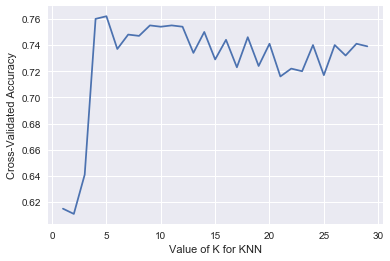

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

Looks like k=5 is the optimal k-value for this dataset. 

In [27]:
classifiers_compare = classifiers_compare.append([["KNN_CV10K5", (k_scores[4])]])



### Do any of your classifiers seem to overfit?

The straightup classifier model (with no testing/training dataset) is the most likely to be overfit, based on the fact that all of the data is included in the model and then is also used to estimate accuracy. 

## Which seem to perform the best? Why?

The Bernoulli Model with the 10 cross-validated folds is likely to be the least susceptible to overfitting and the most reliable accuracy indicator. 


## What features seemed to be most impactful to performance?

The model used had a large impact on performance. In this case, Bernoulli Naive Bayes was a better model than K-Nearest Neighbors. 

In [28]:
classifiers_compare

,0,1
0,straightUp,0.787000
0,bernoulli70,0.793333
0,bernoulli_CV3,0.748954
0,bernoulli_CV10,0.773000
0,KNN_CV3,0.680158
0,KNN_CV10K5,0.762000
